In [1]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/Social_Network_Ads.csv')

# checking the shape of the data
dataset.shape

(400, 5)

In [62]:

# Data Preprocessing
def preprocess_data(df):
    df = add_advanced_features(df)
    X = df.drop(columns=["Purchased"])
    y = df["Purchased"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [3]:
# checking the head of the data

dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
# checking the tail of the data

dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0
399,15594041,Female,49.0,36000.0,1


In [5]:
# describing the dataset

dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# getting the info of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [7]:
# checking the datatypes of the data

dataset.dtypes

,0
User ID,int64
Gender,object
Age,float64
EstimatedSalary,float64
Purchased,int64


In [8]:
# checking if the dataset contains any NULL values

dataset.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
# checking the columns inside the dataset

dataset.columns

In [9]:
# let's check the values present in the purchased

dataset['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


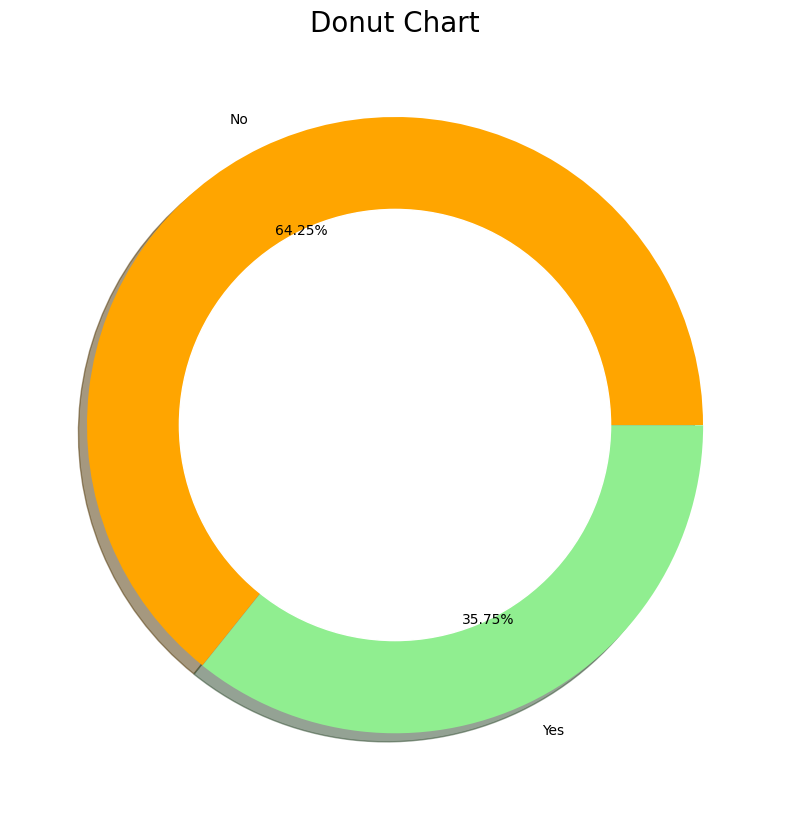

In [10]:
size = [257, 143]
colors = ['orange', 'lightgreen']
explode = [0, 0.001]
labels = 'No','Yes'

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, pctdistance = 0.7, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Chart', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

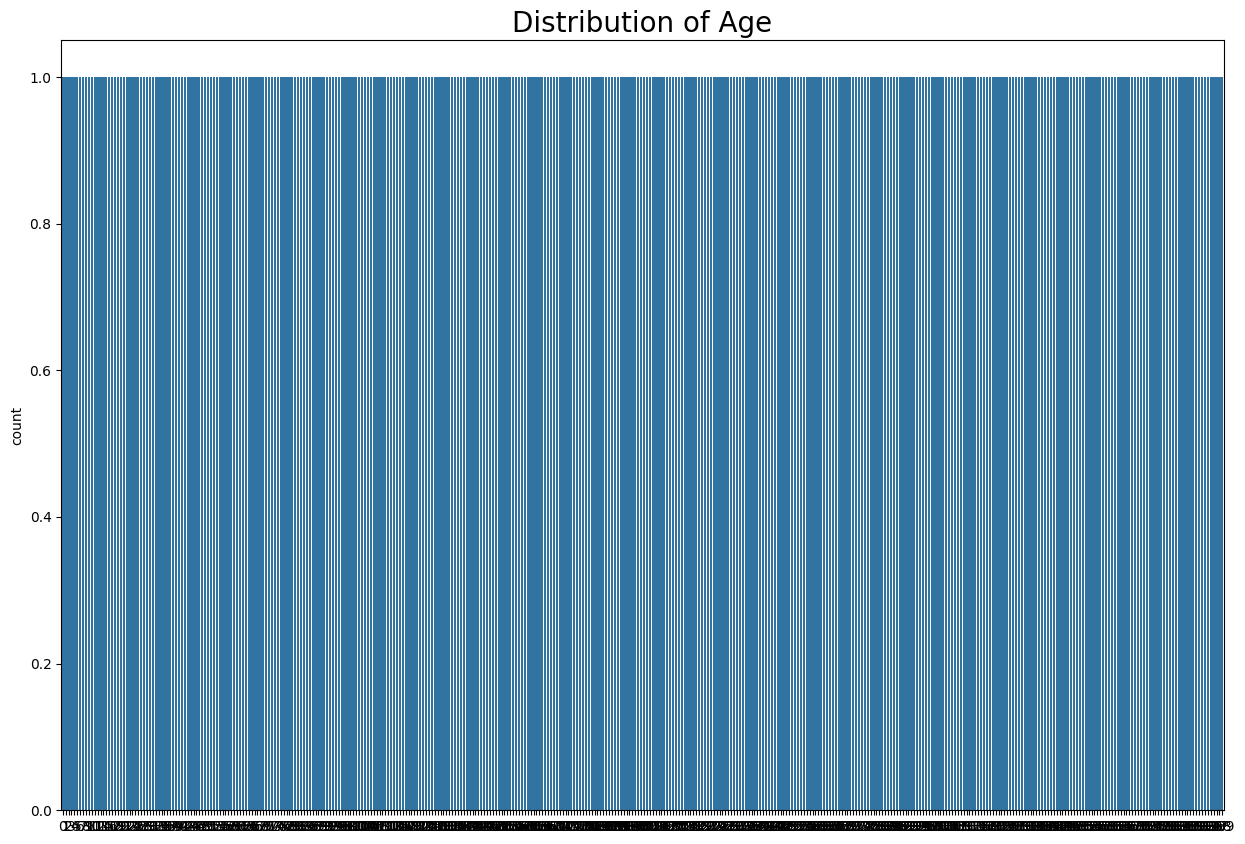

In [48]:
# checking the age of people

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(dataset['Age'])
plt.title('Distribution of Age', fontsize = 20)

<ipython-input-43-3a94cf88be5b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['EstimatedSalary'], color = 'blue')


Text(0.5, 1.0, 'Distrinution of Salary amongst the Customers')

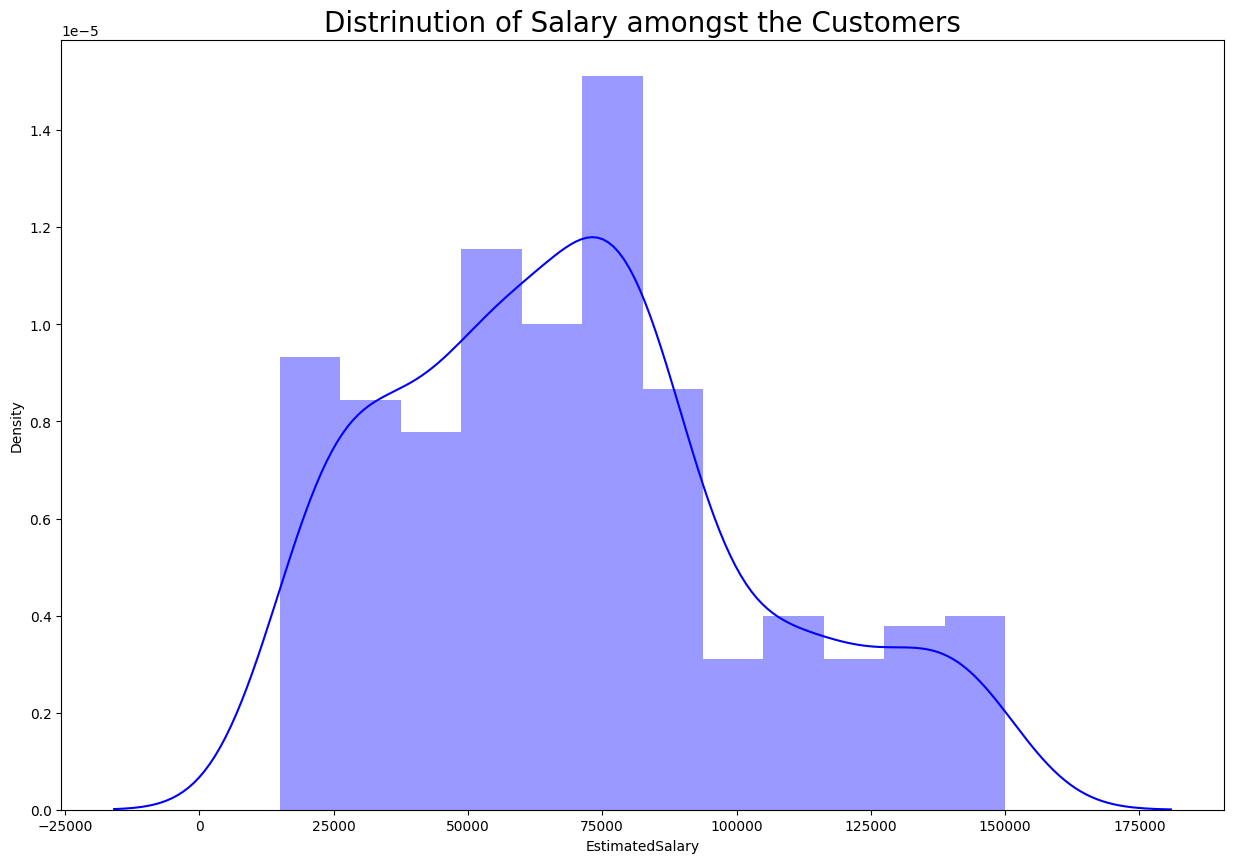

In [43]:
# distribution of salary amongst the customers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(dataset['EstimatedSalary'], color = 'blue')
plt.title('Distrinution of Salary amongst the Customers', fontsize = 20)

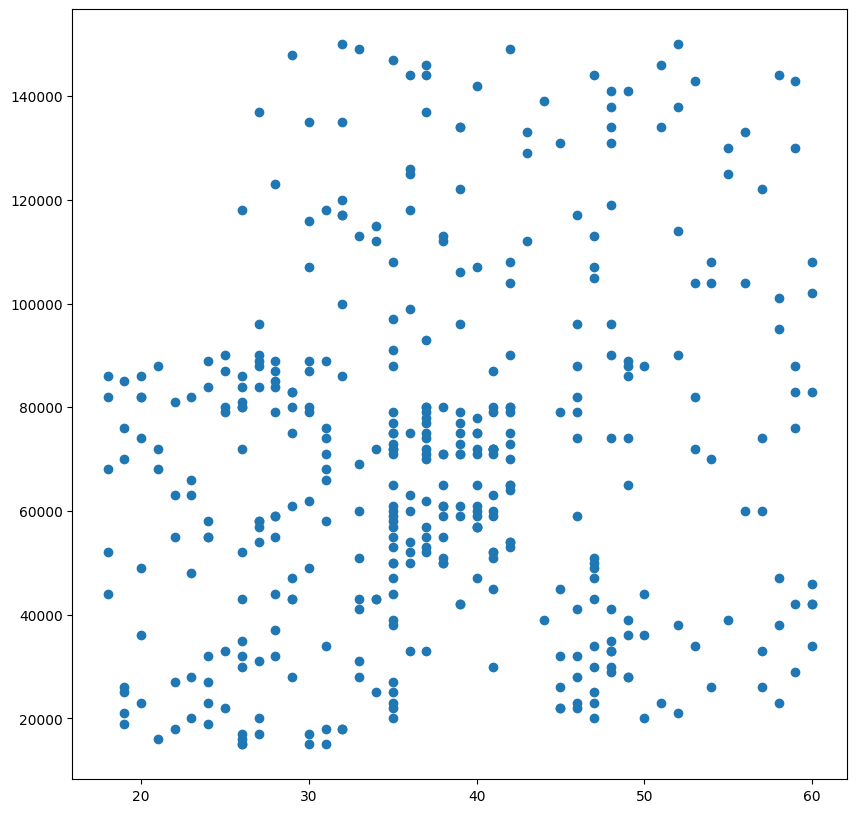

In [13]:
# plotting a scatter plot for age and purchased

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(dataset['Age'], dataset['EstimatedSalary'])
plt.show()

<Axes: xlabel='Purchased'>

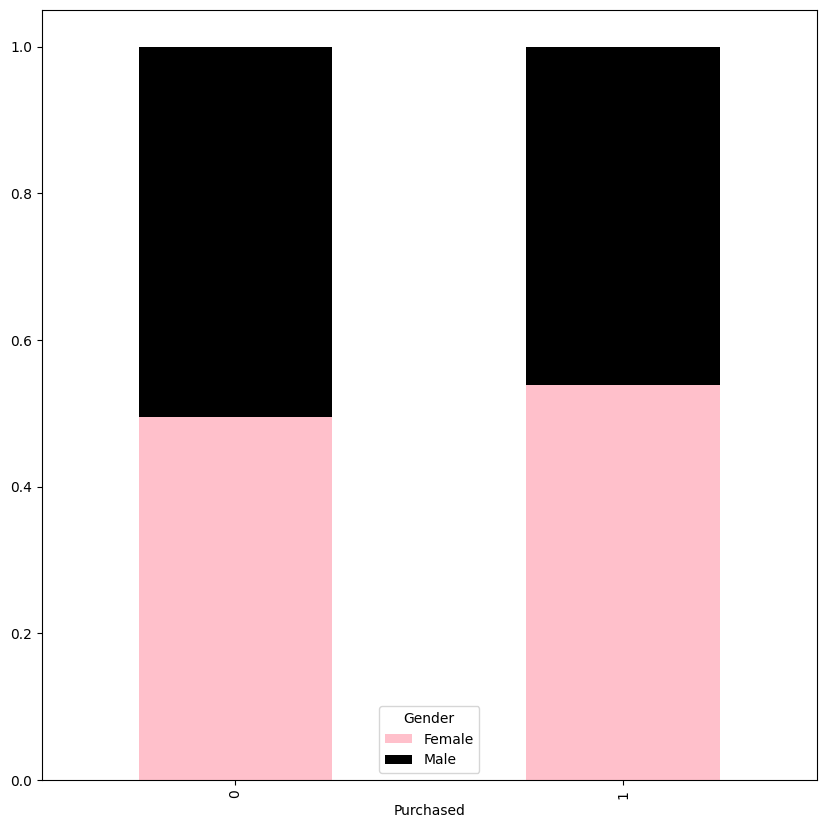

In [14]:
# column chart for looking at the relation of gender in purchased

data = pd.crosstab(dataset['Purchased'], dataset['Gender'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 10), color = ['pink', 'black'])

<ipython-input-45-460488c7ca4a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=dataset['Purchased'], y=dataset['Age'], palette='Set1', data=dataset)


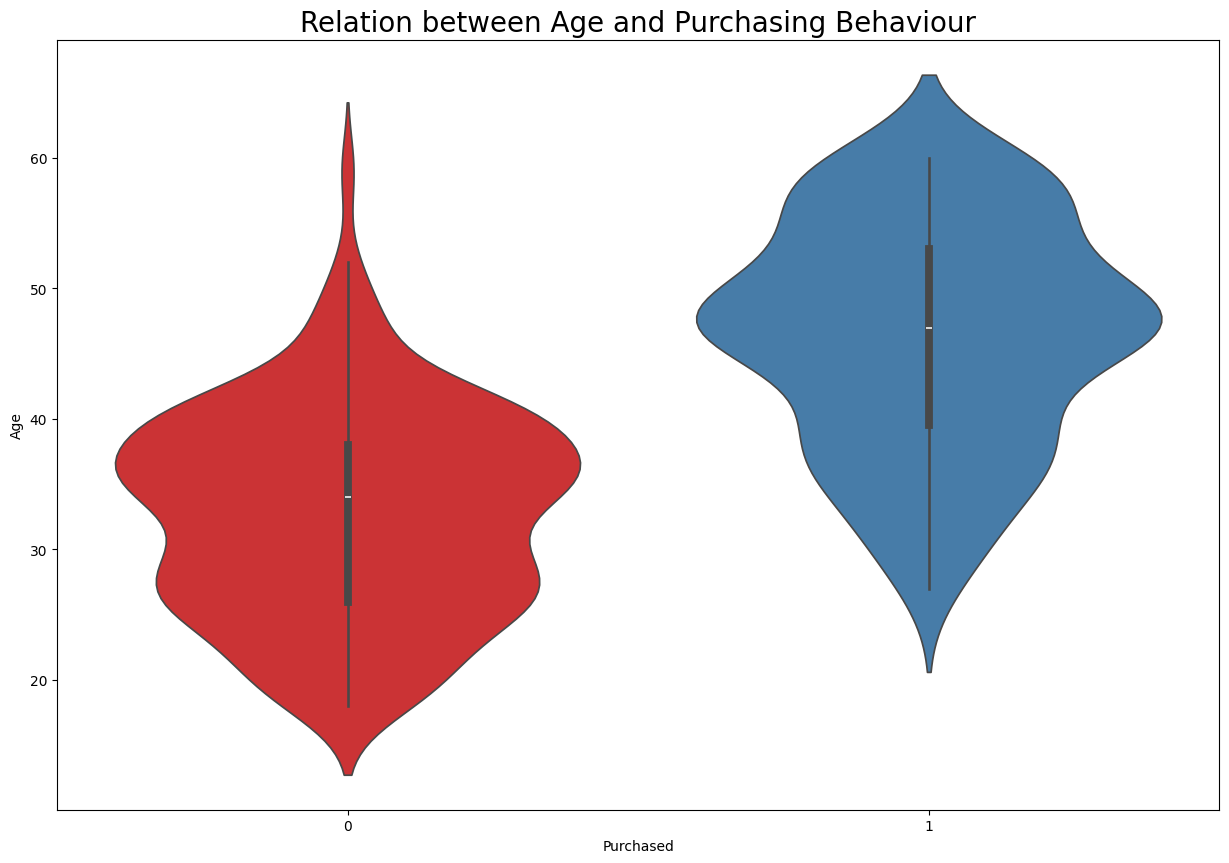

In [45]:
# violin plot

plt.rcParams['figure.figsize'] = (15, 10)
# The 'x' and 'y' arguments should be used to specify the data columns.
#  'x' for the categorical variable (Purchased)
#  'y' for the numerical variable (Age)
# and 'data' argument should be the DataFrame containing the data.

sns.violinplot(x=dataset['Purchased'], y=dataset['Age'], palette='Set1', data=dataset)
plt.title('Relation between Age and Purchasing Behaviour', fontsize=20)
plt.show()

<ipython-input-50-96affcf9c370>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['Purchased'], y=dataset['EstimatedSalary'], palette = 'Set2') # Corrected the function call


Text(0.5, 1.0, 'Estimated Salary vs Predicted Purchase by a Customer')

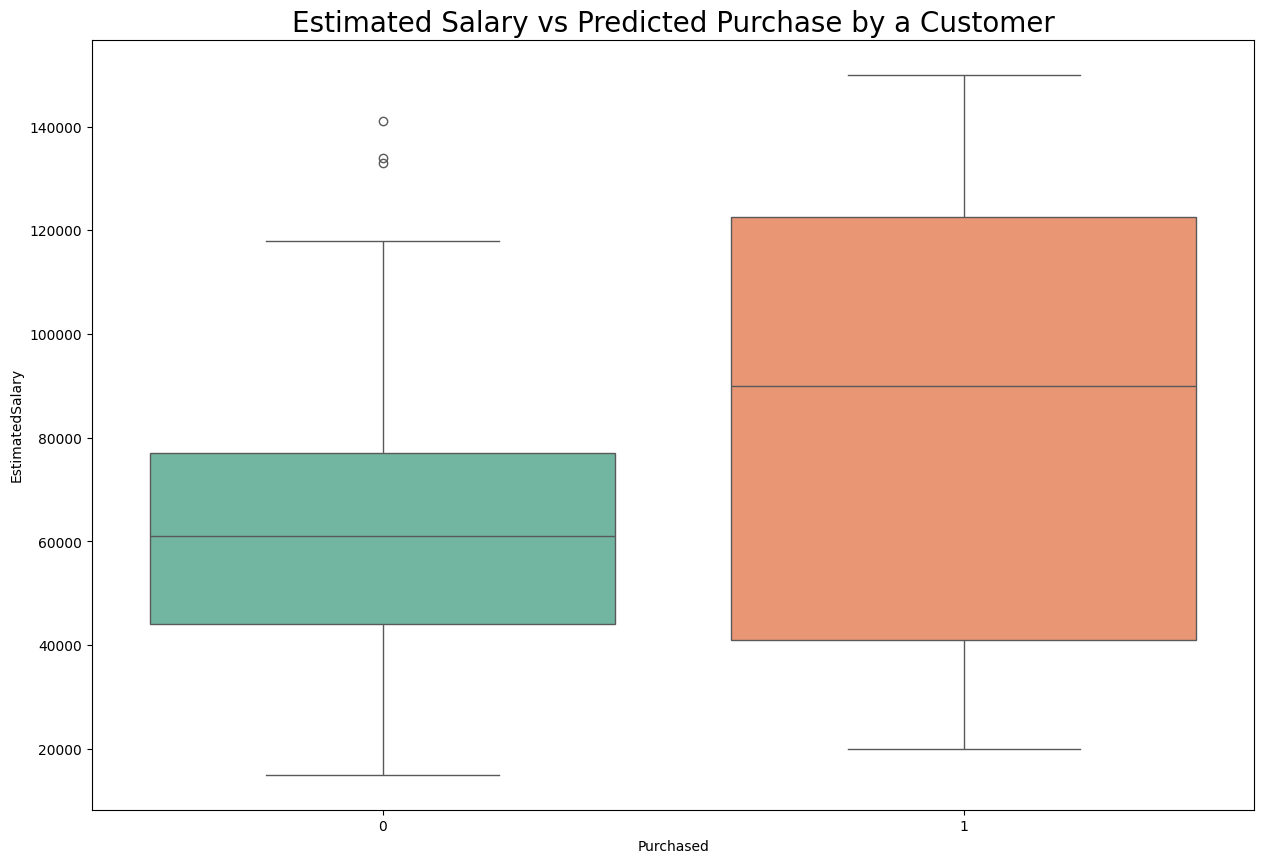

In [50]:
# box plot

# estimated salary vs predicted

plt.rcParams['figure.figsize'] = (15, 10)
# The 'x' and 'y' arguments should be used to specify the data columns.
# 'x' for the categorical variable (Purchased)
# 'y' for the numerical variable (EstimatedSalary)
# and 'data' argument should be the DataFrame containing the data.
sns.boxplot(x=dataset['Purchased'], y=dataset['EstimatedSalary'], palette = 'Set2') # Corrected the function call
plt.title('Estimated Salary vs Predicted Purchase by a Customer', fontsize = 20)

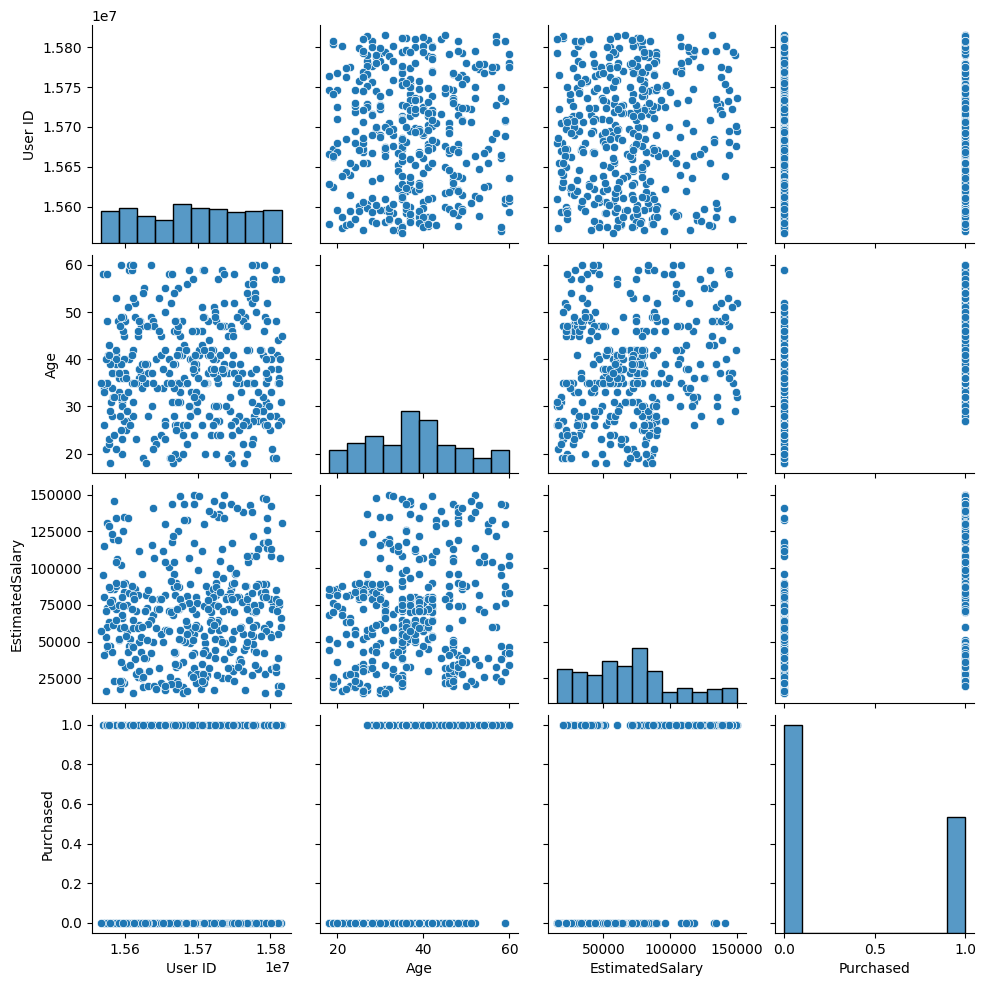

In [17]:
# plotting a pairplot for the data

sns.pairplot(dataset)

<Axes: >

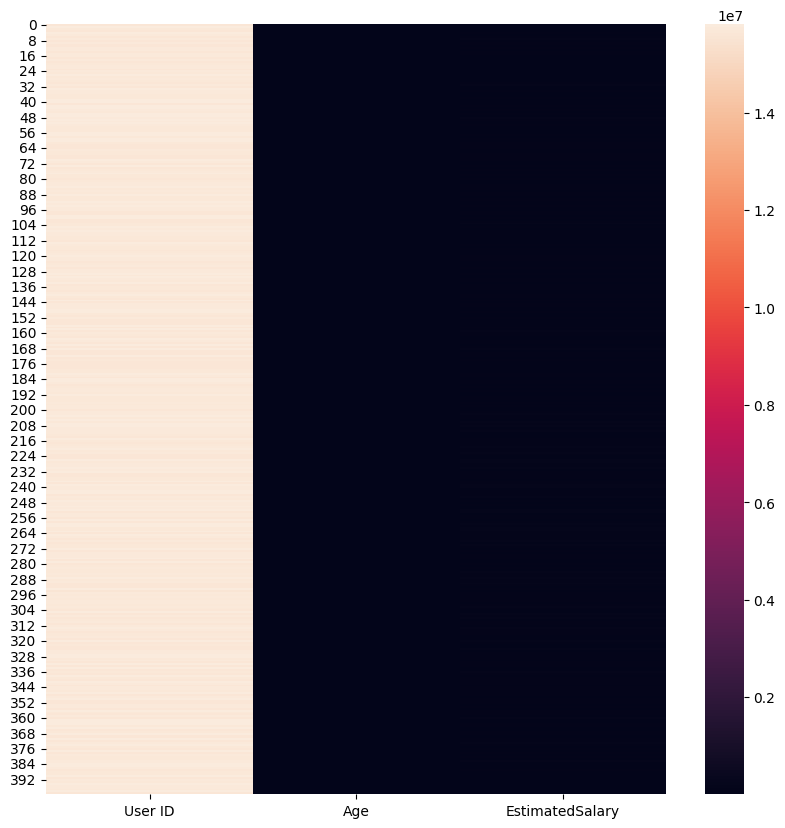

In [18]:
# plotting a heatmap  for the data

plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(dataset[['User ID', 'Age', 'EstimatedSalary']])

In [19]:
# clustering

x = dataset.iloc[:, [2, 3]].values

# checking the shape  of x
x.shape

(400, 2)

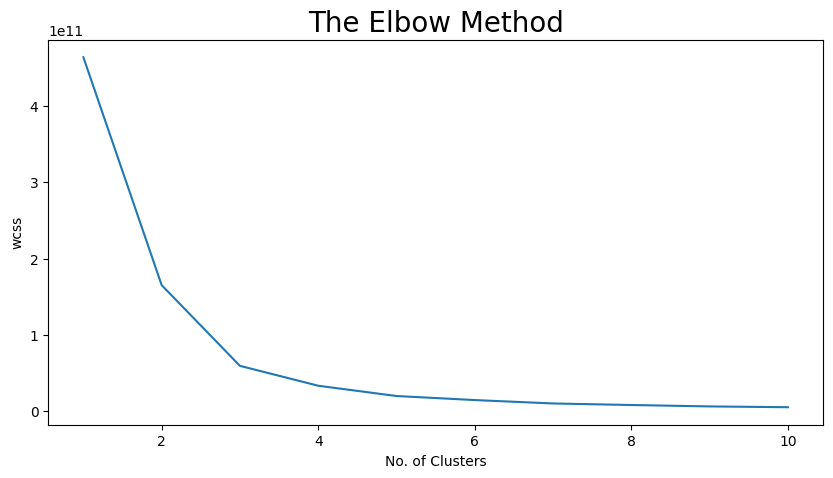

In [20]:
# checking the optimum no. of clusters for the dataset

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)

# plotting the results

plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

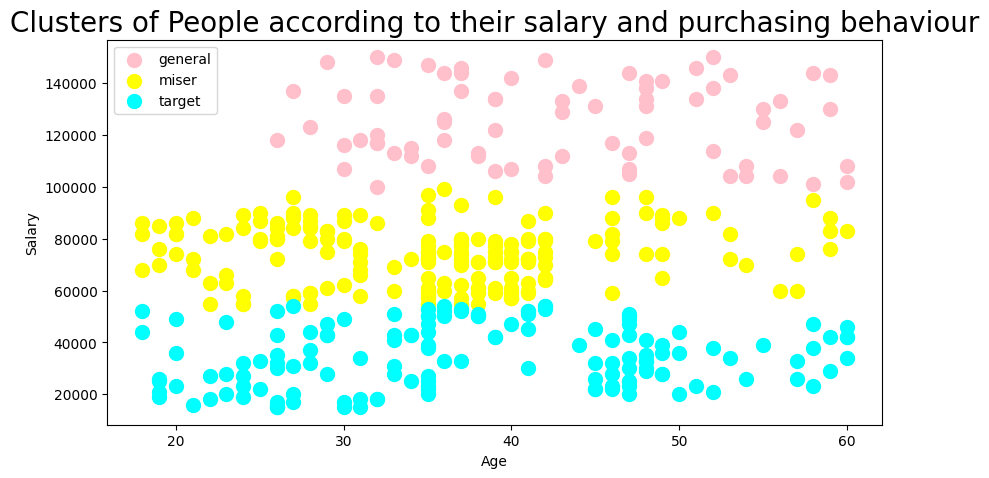

In [21]:
# making clusters

kmeans = KMeans(n_clusters = 3, max_iter = 300,  init = 'k-means++', random_state = 0, n_init = 10)
y_means = kmeans.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')

plt.title('Clusters of People according to their salary and purchasing behaviour',  fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [22]:
# splitting the dataset into dependent and independent sets

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# checking the shape of the datasets
print("Shape of X :", X.shape)
print('Shape of y :', y.shape)


Shape of X : (400, 2)
Shape of y : (400,)


In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# getting the shapes of newly created datasets
print("Shape of x_train : ", X_train.shape)
print("Shape of x_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (300, 2)
Shape of x_test :  (100, 2)
Shape of y_train :  (300,)
Shape of y_test :  (100,)


In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# Fitting Kernel SVM to the Training set

from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

<Axes: >

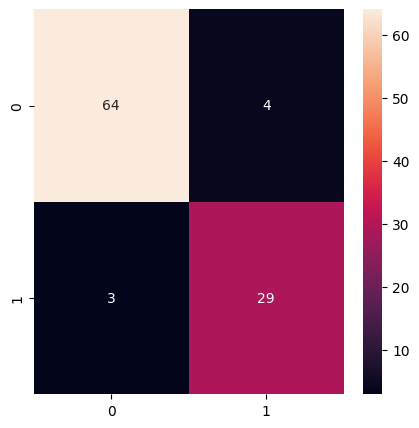

In [27]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (5 , 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [28]:
# Applying k-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

# getting the results
print(accuracies.mean())
print(accuracies.std())

0.9033333333333333
0.06574360974438671


In [29]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]


grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)


# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [30]:
print(best_parameters)

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


In [31]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 1 ,gamma = 0.7)
classifier.fit(X_train, y_train)



SVC(C=1, gamma=0.7)

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

<Axes: >

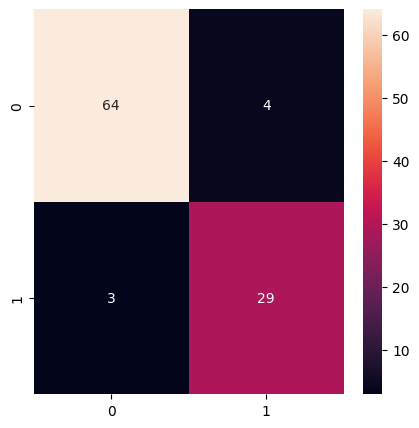

In [33]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [34]:
# making a classification report

from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



<ipython-input-35-451a752d797c>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


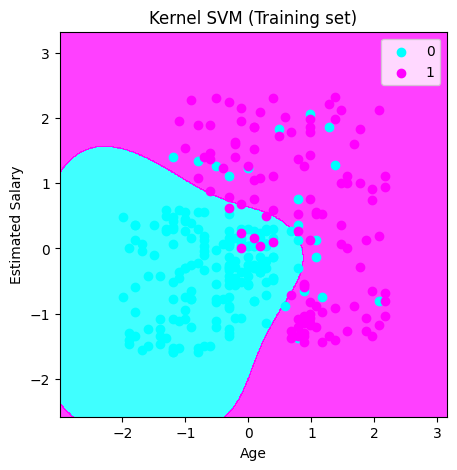

In [35]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('cyan', 'magenta'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-36-fcc25f8be531>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


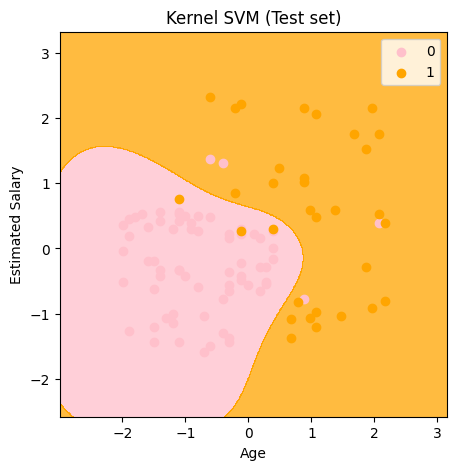

In [36]:
# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('pink', 'orange'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [58]:
# Feature Engineering - Expanding Features
def add_advanced_features(df):
    df["Age_Squared"] = df["Age"] ** 2
    df["Salary_Squared"] = df["EstimatedSalary"] ** 2
    df["Age_Salary_Ratio"] = df["Age"] / (df["EstimatedSalary"] + 1)
    df["Age_Log"] = np.log(df["Age"] + 1)
    df["Salary_Log"] = np.log(df["EstimatedSalary"] + 1)
    df["Age_Salary_Product"] = df["Age"] * df["EstimatedSalary"]
    df["Age_Cube"] = df["Age"] ** 3
    df["Salary_Cube"] = df["EstimatedSalary"] ** 3
    df["Age_Exp"] = np.exp(df["Age"])
    df["Salary_Exp"] = np.exp(df["EstimatedSalary"])
    df["Age_Sqrt"] = np.sqrt(df["Age"])
    df["Salary_Sqrt"] = np.sqrt(df["EstimatedSalary"])
    df["Age_Binned"] = pd.cut(df["Age"], bins=5, labels=False)
    df["Salary_Binned"] = pd.cut(df["EstimatedSalary"], bins=5, labels=False)
    return df

In [53]:
# Model Training and Evaluation
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Gradient Boosting": GradientBoostingClassifier(),
        "SVM": SVC(probability=True),
        "KNN": KNeighborsClassifier()
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"{name} Accuracy: {acc:.4f}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("-" * 50)
    return models, results

In [55]:
# Deep Learning Model with TensorFlow/Keras
def build_nn_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [56]:
# SHAP Feature Importance
def shap_analysis(model, X_train):
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train)